# Final Project PIC 16A

By: Celeste Vargas Vera and Kelvin De Leon

## 1. Group Contribution Statement
“The two of us wrote the data acquisition and preparation. Celeste led Figure 1 and the Random Forest model. Kelvin led Figure 2 and the K-nearest-neighbors model. We both led Table 1. Kelvin wrote the explanation of all figures, Celeste wrote the explanation of the two models, and we both worked on the conclusion. We both checked each other’s work and made revisions to code and writing.”

### Downloading and Importing Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

## 2. Data Import and Cleaning

We began the data import and cleaning by observing the original state of the dataset.

In [3]:
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

In [4]:
penguins.shape

(344, 17)

In [5]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


We continued by separating the data into test and train, that way we can drop the comment section, as well as the rows with NAs. This was an easier way to ensure that both the X and Y train and test sets do not have rows with NAs.

In [6]:
#Separating data
train, test = train_test_split(penguins, test_size=0.20, random_state = 2021)
train = train.drop(['Comments'], axis = 1)
test = test.drop(['Comments'], axis = 1)


In [7]:
test = test.dropna(axis = "rows")
train = train.dropna(axis = "rows")


Down below we made a function that would preprocess the data, allowing us to create X and y test and train datasets. Based on the documentation of the Penguins dataset, we decided to delete the following columns: 'Individual ID','studyName', 'Region', 'Stage', 'Date Egg', 'Sample Number', and 'Clutch Completion.' These columns were either identifiers, a single location, stage, or difficult to interpret because we did not collect the data directly. The final row length for the train data sets is 263, and the row length for the test data sets is 62. Additional changes we made was encoding the column 'Island' into numbers so that our models have an easier time interpreting the data. We also encoded the column 'Sex' into a binary 0 and 1, again, for ease of interpretability. The final clean X datasets consist of 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', and 'Delta 13 C (o/oo),' and the y datasets include the column 'Species'.

In [8]:
from sklearn import preprocessing
def prep_penguin_data(data_df):
    """
    Encode Island and Sex
    Drop columns not needed
    
    Make x and y
    
    returns dataframe
    """
    df = data_df.copy()
    le = preprocessing.LabelEncoder()
    df['Island'] = le.fit_transform(df['Island'])
    df = df.drop(['Individual ID','studyName', 'Region', 'Stage', 'Date Egg', 'Sample Number', 'Clutch Completion'], axis = 1)
    recode = {'MALE':int(0), 'FEMALE':int(1)}
    df['Sex'] = df['Sex'].map(recode)
    
    X = df.drop(['Species'], axis = 1)
    y = df['Species']
        
    return(X, y)



X_train, y_train = prep_penguin_data(train)
X_test,  y_test  = prep_penguin_data(test)

In [9]:
print(X_train.shape)
print(X_test.shape)

(263, 8)
(62, 8)


In [10]:
X_train.columns

Index(['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)'],
      dtype='object')

## 3. Exploratory Data Analysis

### Figure 1: Correlation Plot

To begin our Exploratory Data Analysis, we wanted to explore the relationship between our variables. We used the X_train dataset because it is the bigger data set with our updated variables of interest. Based on this correlation plot, we are able to oberseve that column Island has three categories, meaning the penguins originate from three islands. From our original dataset, these Islands are Biscoe, Dream and Torgersen. We are also able to observe that variables Body Mass (g), Culmen Length (mm), Culmen Depth (mm), and Flipper Length (mm) tend to be more positively linear in their interactions with each other, which raises our interest in pursuing a deeper analysis on these factors. Lastly, from this correlation plot, we noticed that variables Delta 13 C (o/oo) and Delta 15 N (o/oo) are mostly correlated with each other, leading us to the assumption that these variables might depend on each other, and not be to related to the rest of the variables. Later, we will perform feature selection to learn more about how important these variables are in the classification of penguin species. 

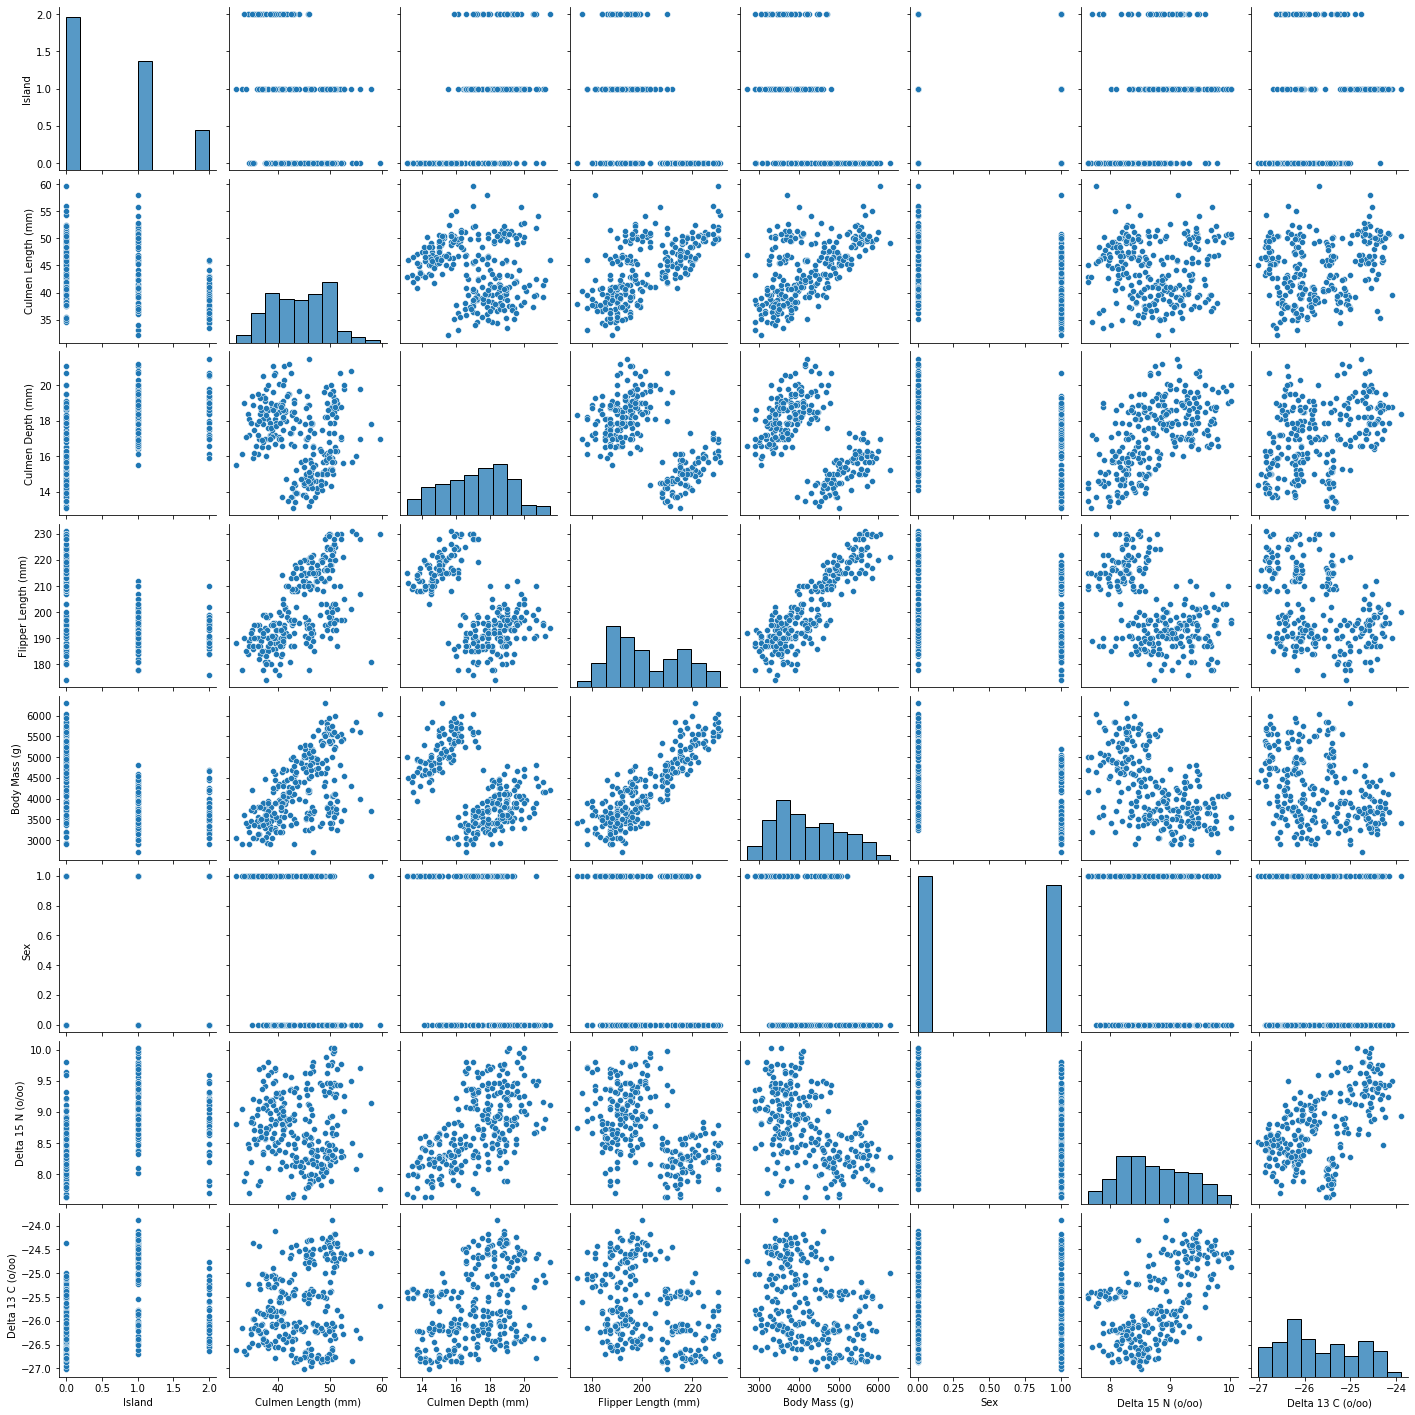

In [10]:
c = sns.pairplot(X_train) 

### Figure 2:  Species Table

For our second figure, we wanted to learn more about our response variable. We have three species of penguins, which include Adelie, Chinstrap and Gentoo. We calculated their means against other variables. From this table, we can see that the Gentoo species has the higher average in body mass, as well as the highest flipper length average. Moreover, the Chinstrap penguin has the longest average Culmen length, while the Adelie penguin has the smallest. Overall, on first observation, we are able to pseudo-classify the Adelie penguin as the smallest of the three and the Gentoo penguin as the biggest. In our feature selection section, we wish to see whether the variables we see as important by glance are actually important mathematically.

In [11]:
penguins.groupby("Species").agg("mean")

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,,
Adelie Penguin (Pygoscelis adeliae),76.5,38.791391,18.346358,189.953642,3700.662252,8.859733,-25.804194
Chinstrap penguin (Pygoscelis antarctica),34.5,48.833824,18.420588,195.823529,3733.088235,9.356155,-24.546542
Gentoo penguin (Pygoscelis papua),62.5,47.504878,14.982114,217.186992,5076.016260,8.245338,-26.185298


### Figure 3: Species and Body Mass Bar Plot

For our third figure, we wanted to investigate the variability in the Body Mass per species. We found that even the lowest body mass in the Gentoo specie is still larger than the averages of both the Adelie and the Chinstrap species. The Adelie and Chinstrap are both more similar in their means and variance of Body Mass. This leads to believe that Body Mass may be an important feature when classifying between the Gentoo and the Adelie and Chinstrap species.

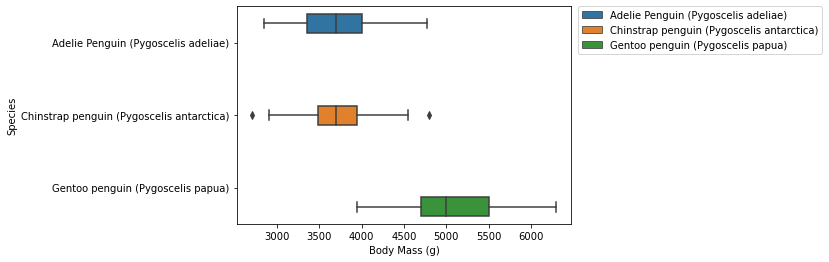

In [12]:
sns.boxplot(x="Body Mass (g)", y="Species", data = penguins, dodge = True,
            hue = 'Species')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## 4. Feature Selection

For our Feature Selection, we decided to employ a greedy stagewise feature selection with a Logistic Regression because our data set consists of 8 variables, which would be too computationally expensive to perform with other methods. For this section, we used the 'Automated Feature Selection' notebook provided in the course website as reference. The steps were the following: initialize a logistic regression model, create a list initializer, followed by a move function, and lastly create a greedy stagewise function to perform feature selection. The greedy stage wise feature selection works by performing a random walk that adds or rejects a column at random. If that column happens to improve the cross-validation score, then that column remains as an "active" column, and if it does not, then it becomes "inactive" or not useful. The goal here is to find the most relevant combination of columns that can help us reduce the error in our models in the future.

In [11]:
LR = LogisticRegression(solver = "liblinear")

In [12]:
def initialize_lists():
    """
    Create an "active" list with a single random column
    from X.columns and an "inactive" list with 
    all remaining columns. 
    """
    # grab a single random column
    active = [np.random.choice(X_train.columns)]
    
    # make a list of all the other columns
    inactive = list(X_train.columns)
    inactive.remove(active[0])
    return active, inactive

In [13]:
def move(col, active, inactive, mode = "activate"):
    """
    Activate or deactivate a single column
    by moving it between the active and inactive
    lists. 
    Does not modify active or inactive -- instead 
    returns copies. 
    """
    # create copies
    new_active = active.copy()
    new_inactive = inactive.copy()
    
    if mode == "activate":
        # if we are activating a column
        new_inactive.remove(col)
        # add col to the active list
        new_active.append(col)
    
    # if we are deactivating a column    
    if mode == "deactivate":
        new_active.remove(col)
        new_inactive.append(col)
    
    # return copies
    return new_active, new_inactive

In [14]:
def greedy_stagewise_feature_selection(model, X, y, n_iters = 20):
    """
    Select a random column and calculate CV score.
    Determine whether column should be kept or removed.
    After a series of iterations,
    Selects the combination of columns with highest CV score. 
    returns a list with the active columns
    """
    
    # initialize with a single, randomly selected column
    active, inactive = initialize_lists()
    
    # initialize the best CV score
    best_CV = 0
    
    # main loop, n_iters times
    for i in range(n_iters):
        # alternate between activating and deactivating
        for mode in ["activate", "deactivate"]:
        
            # if mode is "activate" and there are any remaining inactive
            # columns, randomly select one. Otherwise, continue
            if (mode == "activate"):
                if len(inactive) > 0:
                    col = np.random.choice(inactive)
                else: 
                    continue
            
            # if mode is "deactivate" and if there at least 2 active
            # columns then pick a random active column
            if (mode == "deactivate") and (len(active) >= 2):
                col = np.random.choice(active)
            
            # create a new, proposed active list by moving
            # col between lists
            
            new_active, new_inactive = move(col, active, inactive, mode)
            
            # compute the CV score
            CV_score = cross_val_score(LR, X[new_active], y, cv = 10).mean()
            
            # if the CV score is an improvement, update the 
            # active and inactive column sets. 
            
            if (CV_score > best_CV) and (len(new_active) >=1):
                best_CV = CV_score
                active = new_active
                inactive = new_inactive
            
            print("Number of columns: " + str(len(active)) + ". CV score: " + str(best_CV))
    return active

In [15]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(2021)
best_cols = greedy_stagewise_feature_selection(LR, X_train, y_train, n_iters = 10)

Number of columns: 2. CV score: 0.7455840455840456
Number of columns: 2. CV score: 0.7455840455840456
Number of columns: 3. CV score: 0.9585470085470085
Number of columns: 3. CV score: 0.9585470085470085
Number of columns: 4. CV score: 0.9884615384615385
Number of columns: 4. CV score: 0.9884615384615385
Number of columns: 5. CV score: 0.9924501424501425
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score: 0.9961538461538462
Number of columns: 4. CV score:

In [16]:
best_cols

['Body Mass (g)',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)']

Based on our Feature Selection, we can see that combinations with four features had the most improved cross-validation score at around 99.62%. We found that that features 'Body Mass(g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)' performed the best. Given that we need one qualitative feature and two quantitative features, we have decided to use the variables Island, and Culmen Length (mm) along with Body Mass (g). We decided to use the feature Island because we are interested to see whether regions can help with the classification of Species since there are three, as we saw during our Exploratory Data Analysis, and we decided to choose Body Mass (g) and Culmen Length (mm) because their interaction with other variables had caught our attention during the Exploratory Data Analysis as well, but also because they were two of the four variables we found from our greedy stagewise feature selection. 

## 5. Modeling

Now, onto our modeling. We began by subsetting the columns we were interested in analyzing and assigning those as our X_train and X_test. Additionally, we created a confusion matrix function to faciliate us during our modeling process.

In [18]:
X_train = X_train[['Island', 'Culmen Length (mm)', 'Body Mass (g)']]
X_test = X_test[['Island', 'Culmen Length (mm)', 'Body Mass (g)']]


In [19]:
def make_confusion_matrix(ytest, ypred):
    """
    Create a dataframe of the confusion matrix.
 
    returns a dataframe
    """
    cm = pd.DataFrame(confusion_matrix(ytest, ypred),
                    index = ['Actual ' + decode_species_dict[i] for i in np.unique(ytest)],
                    columns = ['Predicted ' + decode_species_dict[i] for i in np.unique(ytest)])
    return (cm)

### Model 1: Random Forest Classifier

We wanted to use a Random Forest Classifier because we enjoyed learning about Decision Trees in class. However, we wanted to see how using several uncorrelated decision trees can improve performance and decrease the chance of overfitting the data. To perform our Random Forest we used the sklearn package.

To begin, we ran a cross-validation on complexity parameter 'n-estimators'. This parameter is the one that tells the classification model how many trees it should run with. However, to increase our accuracy, we wanted to find the most optimal number of trees. After we ran our 10-fold cross-validation, we found that 250 trees was the most optimal number of trees to use.

We fitted our Random Forest to our train data, and we observed that our Random Forest received a 0.9838709677419355 accuracy score, which is our highest at this point. Our confusion matrix also supports our high accuracy.

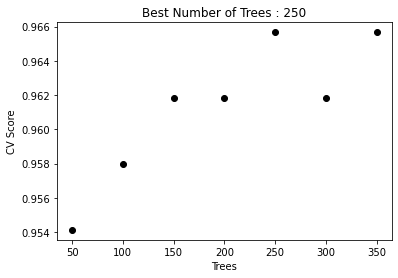

In [20]:
fig, ax = plt.subplots(1)

best_score = 0
Trees = [50, 100, 150, 200, 250, 300, 350, 400]

for d in range(50,400,50):
    T = RandomForestClassifier(n_estimators = d, random_state = 2021)
    cv_score = cross_val_score(T, X_train, y_train, cv=10).mean()
    ax.scatter(d, cv_score, color = "black")
    if cv_score > best_score:
        best_estimator = d
        best_score = cv_score

        l = ax.set(title = "Best Number of Trees : " + str(best_estimator),
           xlabel = "Trees", 
           ylabel = "CV Score")

In [21]:
T = RandomForestClassifier(n_estimators = best_estimator, random_state = 2021)

In [22]:
T.fit(X_train, y_train)
#T.score(X_train, y_train)
print("Accuracy: " + str(T.score(X_test, y_test)))
y_predicted = T.predict(X_test)

Accuracy: 0.9838709677419355


In [23]:
make_confusion_matrix(y_test, y_predicted)

,Predicted Adelie Penguin (Pygoscelis adeliae),Predicted Gentoo penguin (Pygoscelis papua),Predicted Chinstrap penguin (Pygoscelis antarctica)
Actual Adelie Penguin (Pygoscelis adeliae),28,1,0
Actual Gentoo penguin (Pygoscelis papua),0,23,0
Actual Chinstrap penguin (Pygoscelis antarctica),0,0,10


### Model 2: K-Nearest Neighbors

For our second model, we decided to employ a K-Nearest Neighbors classifier. We thought a KNN model would be simple to interpret, given that a point is compared to it's neighbors for classification. We used the sklearn package to run this model well.

Like in Random Forest, we ran a 10-fold cross-validation on the K parameter, which decides how many neighboring classified points around the current point in question should be considered when classifying the point in question. After we ran the cross-validation, we found that 1 neighbor was the most optimal parameter.

We fit our model to the train data set and we obtained a 0.9193548387096774 model accuracy when scored against our test data set, which is highly accurate. From our confusion matrix, we can also see that our model was highly accurate.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

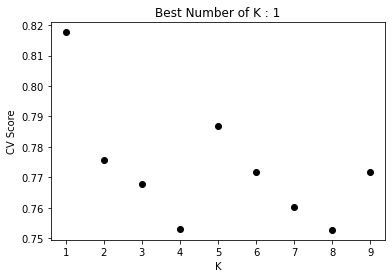

In [25]:
fig, ax = plt.subplots(1)
best_score = 0
for d in range(1,10):
    T = KNeighborsClassifier(n_neighbors = d)
    cv_score = cross_val_score(T, X_train, y_train, cv=10).mean()
    ax.scatter(d, cv_score, color = "black")
    if cv_score > best_score:
        best_k = d
        best_score = cv_score

        l = ax.set(title = "Best Number of K : " + str(best_k),
           xlabel = "K", 
           ylabel = "CV Score")

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)

knn_model.fit(X_train, y_train)
print('Accuracy: ' + str(knn_model.score(X_test, y_test)))

Accuracy: 0.9193548387096774


In [27]:
predictions = knn_model.predict(X_test)
make_confusion_matrix(y_test, predictions)

,Predicted Adelie Penguin (Pygoscelis adeliae),Predicted Gentoo penguin (Pygoscelis papua),Predicted Chinstrap penguin (Pygoscelis antarctica)
Actual Adelie Penguin (Pygoscelis adeliae),28,1,0
Actual Gentoo penguin (Pygoscelis papua),1,21,1
Actual Chinstrap penguin (Pygoscelis antarctica),1,1,8


## Discussion

Overall, both of our models had high accuracy scores. We found that the Random Forest was the best model amongst the two. If we were to recommend a combination of a model and features to predict the species of penguins, it would be a Random Forest Classifier with 250 estimators, with Body mass, Culmen Length and Island as the features. If more data were available, we think that the Random Forest could be further improved by also finding the most optimal number of modes each tree should have when performing it's classification.

### Limitations:
Our team was not able to graph decision bounds, that is something that will will work towards in the future when we encounter this again.

TypeError: list indices must be integers or slices, not Series

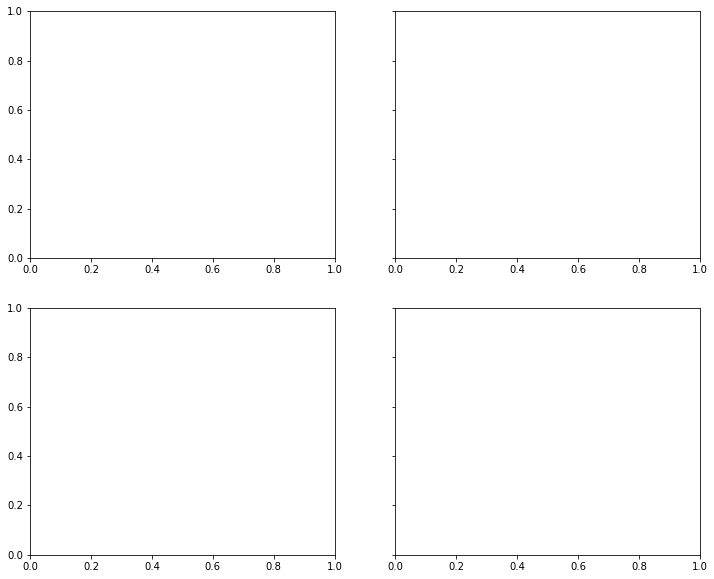

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import patches as mpatches
from math import ceil

uniqueQualValues = [int(i) for i in X_test['Island'].unique()]
fig, ax = plt.subplots(2, 2, figsize = (12, 10), sharey = True)

final_df = X_test
final_df['Island'] = y_test

# create a meshgrid of the dataset
f1_min, f1_max = X_test['Culmen Length (mm)'].min() - 1, X_test['Culmen Length (mm)'].max() + 1
f2_min, f2_max = X_test['Body Mass (g)'].min() - 1, X_test['Body Mass (g)'].max() + 1
f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, 0.5), np.arange(f2_min, f2_max, 10))
for i in uniqueQualValues:
    # predict the class of each point in the meshgrid
    Z = knn_model.predict(np.c_[f1.ravel(), f2.ravel(), np.ones(f1.ravel().shape) * 1.0 * i])
    Z = np.reshape(Z, f1.shape)
    
    #ax[i//2,i%2].scatter(X_train[X_train[:,2]==i][:,0], X_train[X_train[:,2]==i][:,1], c=y_train[X_train[:,2]==i], cmap='jet') # plot the training set samples as a scatter plot
    ax[i//2,i%2].scatter(X_test[X_test['Island']==i]['Culmen Length (mm)'], X_test[X_test['Island']==i]['Body Mass (g)'], c=y_test[X_test['Island']==i], cmap='jet') # plot the test set samples as a scatter plot
    
    ax[i//2,i%2].contourf(f1, f2, Z, alpha=0.2, cmap='jet') # plot the decision regions
    print(Z)
    ax[i//2,i%2].set_xlabel('Feature 1')
    ax[i//2,0].set_ylabel('Feature 2')
    ax[i//2,i%2].set_title('Qualitative Feature Value = ' + str(i))

legend0 = mpatches.Patch(color = 'red', label = 'Class-0', alpha = 0.2)
legend1 = mpatches.Patch(color = 'green', label = 'Class-1', alpha = 0.2)
legend2 = mpatches.Patch(color = 'blue', label = 'Class-2', alpha = 0.2)
fig.legend(handles = [legend0, legend1, legend2],loc = (0.9,0.92), fontsize = 'medium',framealpha = 1)

plt.suptitle('Decision Regions of the SVM Classifier: Test Set')
plt.tight_layout()
plt.show()